In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from termcolor import colored

## Importing Data

In [3]:
df = pd.read_csv('train_LZdllcl.csv') ## train

In [4]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
df2 = pd.read_csv('test_2umaH9m.csv') ## test

In [6]:
df2.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


## Data info and description 

In [7]:
df.info() ## train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [8]:
df2.info() ## test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [9]:
df.describe().transpose() ## train

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


employee_id
not necessary.


no_of_trainings


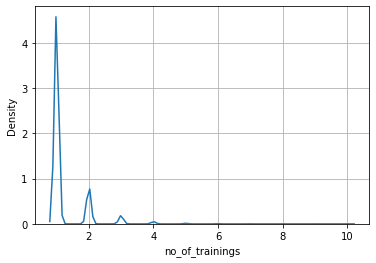

age


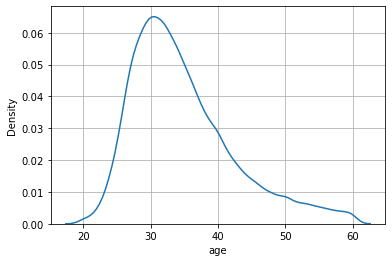

previous_year_rating


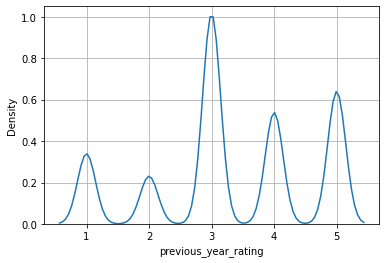

length_of_service


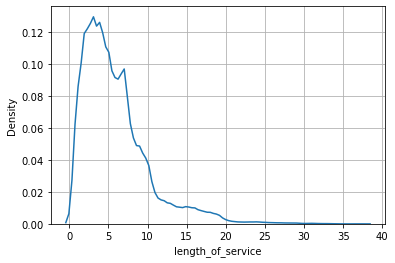

KPIs_met >80%


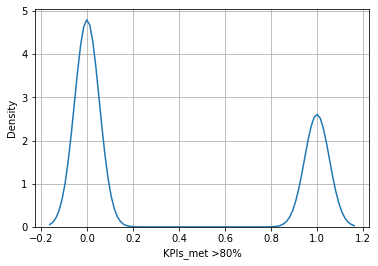

awards_won?


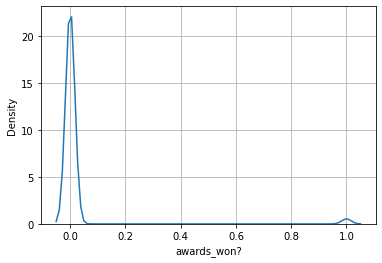

avg_training_score


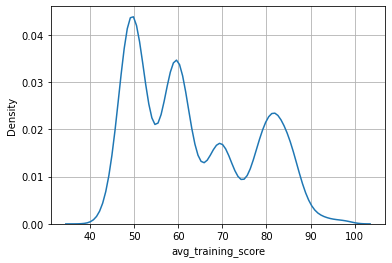

is_promoted


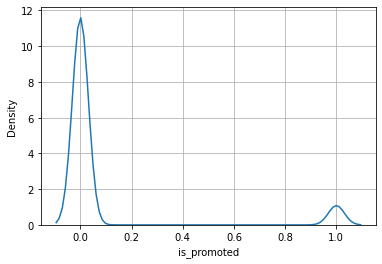

In [10]:
for i in df.describe().columns:
    if i.endswith('id'):
        print(i)
        print('not necessary.\n\n')
    else:
        print(i)
        sns.kdeplot(df[i],vertical=False,gridsize=100)
        plt.grid()
        plt.show()

In [12]:
df.describe().transpose() ## test

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


employee_id
not necessary.


no_of_trainings


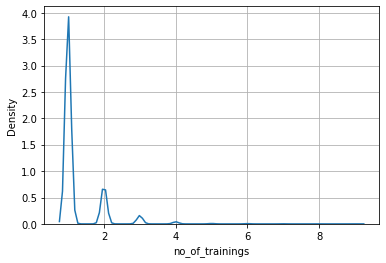

age


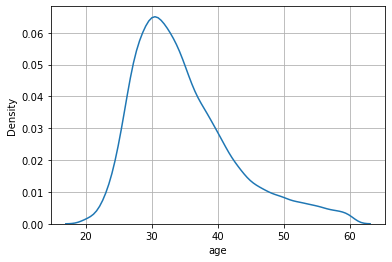

previous_year_rating


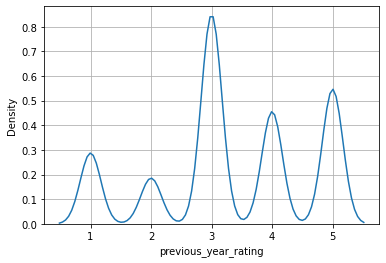

length_of_service


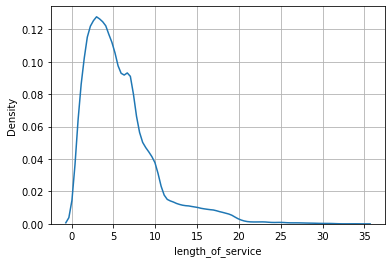

KPIs_met >80%


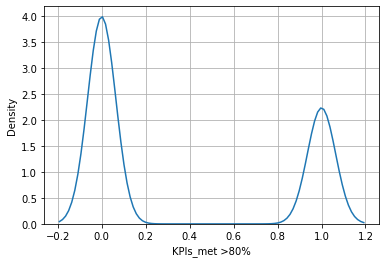

awards_won?


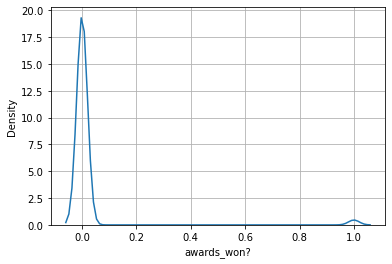

avg_training_score


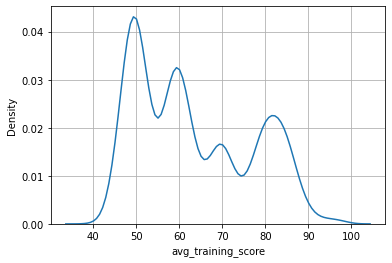

In [13]:
for i in df2.describe().columns:
    if i.endswith('id'):
        print(i)
        print('not necessary.\n\n')
    else:
        print(i)
        sns.kdeplot(df2[i],vertical=False,gridsize=100)
        plt.grid()
        plt.show()

## Null value Analysis

In [14]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [15]:
df2.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

### Lets now merge the 2 train and test data for the purpose of imputing null values! This process of imputing Null values by combining the 2 datasets will avoid "DATA LEAKAGE"

In [16]:
len(df)

54808

In [17]:
len(df2)

23490

In [18]:
temp_df = df.append(df2)

In [21]:
temp_df.isnull().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [22]:
temp_df.education.value_counts()

Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [23]:
temp_df.previous_year_rating.value_counts()

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64

## Imputing the Null values

In [24]:
temp_df.education.fillna("Bachelor's",axis=0,inplace=True)

In [25]:
temp_df.previous_year_rating.fillna(0,axis=0,inplace=True)

In [26]:
df = temp_df[:len(df)]

In [27]:
len(df)

54808

In [28]:
df2 = temp_df[len(df):]

In [29]:
len(df2)

23490

## Analysis of the data

### What is the education of the employees on each dept.

In [36]:
dept_count = pd.DataFrame(df.department.value_counts())
# dept_count

In [37]:
for i in dept_count.index:
    print(i,'\n')
    print(df.loc[df.department == i].education.value_counts())
    print('\n')

Sales & Marketing 

Bachelor's          12674
Master's & above     4166
Name: education, dtype: int64


Operations 

Bachelor's          8007
Master's & above    3165
Below Secondary      176
Name: education, dtype: int64


Technology 

Bachelor's          4741
Master's & above    2196
Below Secondary      201
Name: education, dtype: int64


Procurement 

Bachelor's          4465
Master's & above    2544
Below Secondary      129
Name: education, dtype: int64


Analytics 

Bachelor's          4315
Master's & above    1037
Name: education, dtype: int64


Finance 

Bachelor's          1931
Master's & above     499
Below Secondary      106
Name: education, dtype: int64


HR 

Bachelor's          1557
Master's & above     733
Below Secondary      128
Name: education, dtype: int64


Legal 

Bachelor's          818
Master's & above    156
Below Secondary      65
Name: education, dtype: int64


R&D 

Bachelor's          570
Master's & above    429
Name: education, dtype: int64




In [38]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,age_category,los_category
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,30 - 39 years,6 - 10 years
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,30 - 39 years,3 - 5 years
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,30 - 39 years,6 - 10 years
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,30 - 39 years,6 - 10 years
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,40 - 49 years,1 - 2 years


### Adding new features for the purpose of analysis

In [41]:
# Adding new feature "Age Category"
ac = []
for i in df.age:
    if 20 <= i < 30:
        ac.append('20 - 29 years')
    elif 30<= i < 40:
        ac.append('30 - 39 years')
    elif 40<= i < 50:
        ac.append('40 - 49 years')
    elif 50<= i <= 60:
        ac.append('50 - 60 years')
df['age_category'] = ac

In [42]:
# Adding new feature "los category"
los = []
for i in df.length_of_service:
    if 1<=i<3:
        los.append('1 - 2 years')
    elif 3<= i < 6:
        los.append('3 - 5 years')
    elif 6<= i < 11:
        los.append('6 - 10 years')
    elif 11<= i < 21:
        los.append('11 to 20 years')
    elif 21 <= i < 31:
        los.append('21 - 30 years')
    elif i > 30:
        los.append('> than 30 years')
df['los_category'] = los

###  Previous year rating wrt gender

In [78]:
print(df.previous_year_rating.groupby(df.gender).mean().sort_values(ascending=False))
print('\nInference : Female employees have slightly better ratings than male employees.\n(nothing significant)')

gender
f    3.136341
m    3.054343
Name: previous_year_rating, dtype: float64

Inference : Female employees have slightly better ratings than male employees.
(nothing significant)


In [238]:
# df.gender.value_counts()

### Previous year rating wrt region 

In [79]:
# df.previous_year_rating.groupby(df.region).mean().sort_values(ascending=False).head(10) # top 10 regions
prev_year_rating_region = pd.DataFrame(df.previous_year_rating.groupby(df.region).mean().sort_values(ascending=False)) # full list

met = []
for i in prev_year_rating_region.previous_year_rating:
    if i >= 3.0:
        met.append(1)
    else:
        met.append(0)
prev_year_rating_region['metrics'] = met
reg_val = []
for i in prev_year_rating_region.index:
    reg_val.append(i.split('_')[1])
prev_year_rating_region['reg_val'] = reg_val
prev_year_rating_region['reg_val'] = prev_year_rating_region['reg_val'].astype(int)

In [236]:
prev_year_rating_region.sort_values('reg_val',ascending=True)

,previous_year_rating,metrics,reg_val
region,,,
region_1,3.172131,1,1
region_2,3.113101,1,2
region_3,3.355491,1,3
region_4,3.406929,1,4
region_5,2.766319,0,5
region_6,2.713043,0,6
region_7,3.224241,1,7
region_8,3.076336,1,8
region_9,2.435714,0,9


### Previous year rating wrt education

In [81]:
print(df.previous_year_rating.groupby(df.education).mean().sort_values(ascending=False))
print('\nInference : Theres a significant difference bachelors and BS. however,\nthere is also a noticeable difference between bach. and Mast. employees!') 

education
Master's & above    3.333936
Bachelor's          3.003762
Below Secondary     1.987578
Name: previous_year_rating, dtype: float64

Inference : Theres a significant difference bachelors and BS. however,
there is also a noticeable difference between bach. and Mast. employees!


In [133]:
# df.head()

### Previous year rating wrt department

In [89]:
print(df.previous_year_rating.groupby(df.department).mean().sort_values(ascending=False))
print('\nInference : Operations have the highest average rating, however,\nthe technology dept. have not had a great year!')

department
Operations           3.443955
R&D                  3.253253
Analytics            3.247571
HR                   3.128619
Finance              3.115142
Procurement          3.100588
Technology           2.917064
Legal                2.854668
Sales & Marketing    2.829097
Name: previous_year_rating, dtype: float64

Inference : Operations have the highest average rating, however,
the technology dept. have not had a great year!


### Previous year rating wrt recruitment_channel


In [93]:
print(df.previous_year_rating.groupby(df.recruitment_channel).mean().sort_values(ascending=False))
print('\nInference : It is quite clear that the emps joined based on referal have done quite significantly well.')

recruitment_channel
referred    3.550788
sourcing    3.073213
other       3.065263
Name: previous_year_rating, dtype: float64

Inference : It is quite clear that the emps joined based on referal have done quite significantly well.


### Previous year rating wrt no_of_trainings

In [194]:
pyr_not = pd.DataFrame(df.previous_year_rating.groupby(df.no_of_trainings).mean().sort_values(ascending=False))

In [195]:
ec_not = pd.DataFrame(df.no_of_trainings.value_counts())

In [196]:
merged = pd.concat([pyr_not,ec_not],axis=1)
merged.rename(columns={'no_of_trainings':'emp_count'},inplace=True)
merged['no_of_trainings'] = merged.index

In [199]:
print(merged.sort_index())
print('\n\nInference : People who went through more than 1 training have not gotten good ratings the next year.')
print(colored('\nActionable Insight : Reduce the number of trainings for the employees significantly! (at the max 3)','red',attrs=['bold']))

    previous_year_rating  emp_count  no_of_trainings
1               3.117581      44378                1
2               2.969576       7987                2
3               2.814752       1776                3
4               2.551282        468                4
5               2.531250        128                5
6               2.022727         44                6
7               2.666667         12                7
8               2.200000          5                8
9               1.600000          5                9
10              2.600000          5               10


Inference : People who went through more than 1 training have not gotten good ratings the next year.

Actionable Insight : Reduce the number of trainings for the employees significantly! (at the max 3)


### Previous year rating wrt age_category

In [200]:
print(df.previous_year_rating.groupby(df.age_category).mean().sort_values(ascending=False))
print(colored('\nSurprisingly','red'),colored('Age catg. 20-29','blue',attrs=['bold']),colored('have the lowest ratings!','red'))

age_category
40 - 49 years    3.323615
50 - 60 years    3.302401
30 - 39 years    3.282269
20 - 29 years    2.480177
Name: previous_year_rating, dtype: float64

Surprisingly Age catg. 20-29 have the lowest ratings!


### Previous year rating wrt age

In [122]:
# df.previous_year_rating.groupby(df.age).mean().sort_values(ascending=False)

### Previous year rating wrt length of service category


In [128]:
print(df.previous_year_rating.groupby(df.los_category).mean().sort_values(ascending=False))
print('\nInferences : Experienced candidates have performed better than the candidates with less experience.\nThis also can be verified by the analysis of ratings and the Age category aspect.')
## previous year rating wrt length of service
# df.previous_year_rating.groupby(df.length_of_service).mean().sort_values(ascending=False)

los_category
> than 30 years    3.613636
6 - 10 years       3.341801
3 - 5 years        3.328054
11 to 20 years     3.313711
21 - 30 years      3.293249
1 - 2 years        2.096608
Name: previous_year_rating, dtype: float64

Inferences : Experienced candidates have performed better than the candidates with less experience.
This also can be verified by the analysis of ratings and the Age category aspect.


### Previous year rating wrt KPI met 


In [201]:
print(df.previous_year_rating.groupby(df['KPIs_met >80%']).mean().sort_values(ascending=False))
print('\nInference : candidates who have achived KPIs > 80 have Significantlty better ratings than others')

KPIs_met >80%
1    3.636307
0    2.775910
Name: previous_year_rating, dtype: float64

Inference : candidates who have achived KPIs > 80 have Significantlty better ratings than others


### How many have achived KPI > 80?

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64


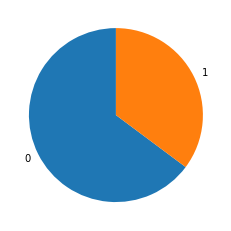

In [210]:
## count of how many have achieved the KPI's > 80%
plt.pie(df['KPIs_met >80%'].value_counts(),labels=df['KPIs_met >80%'].value_counts().index,startangle=90)
print(df['KPIs_met >80%'].value_counts())
plt.show()

### Previous year rating wrt awards won

In [218]:
print(df.previous_year_rating.groupby(df['awards_won?']).mean().sort_values(ascending=False))
print('\nInference : employees who hav not won awards have also equally performed well,\nhowever, employees who got an award have a noticelably higher rating than those who didnt')

awards_won?
1    3.287402
0    3.073798
Name: previous_year_rating, dtype: float64

Inference : employees who hav not won awards have also equally performed well,
however, employees who got an award have a noticelably higher rating than those who didnt


### Previous year rating wrt promotion


In [219]:
print(df.previous_year_rating.groupby(df['is_promoted']).mean().sort_values(ascending=False))
print('\nInference : people who got promoted also had better ratings than emps who did not get promoted')

is_promoted
1.0    3.696658
0.0    3.021221
Name: previous_year_rating, dtype: float64

Inference : people who got promoted also had better ratings than emps who did not get promoted


In [293]:
# df.head()

### Department, KPIs met wrt the ratings 

In [295]:
dept_kpi_ispr = df.groupby(['department','KPIs_met >80%','is_promoted']).mean()[['age','previous_year_rating','avg_training_score']]

In [296]:
dept_kpi_ispr

age  previous_year_rating  \
department        KPIs_met >80% is_promoted                                    
Analytics         0             0.0          32.701187              2.912929   
                                1.0          31.363057              3.636943   
                  1             0.0          32.207412              3.686394   
                                1.0          31.738028              3.698592   
Finance           0             0.0          32.664062              2.808239   
                                1.0          31.842105              3.394737   
                  1             0.0          31.427332              3.500000   
                                1.0          30.107692              3.546154   
HR                0             0.0          34.835564              2.885915   
                                1.0          36.853659              3.731707   
                  1             0.0          33.469846              3.556802   
                                1.0          32.768421              3.663158   
Legal             0             0.0          34.190265              2.640118   
                                1.0          32.285714              2.714286   
                  1             0.0          33.376623              3.269481   
                                1.0          31.769231              3.358974   
Operations        0             0.0          35.979136              3.076610   
                                1.0          37.052308              3.944615   
                  1             0.0          36.130788              3.873747   
                                1.0          36.106017              3.859599   
Procurement       0             0.0          35.964277              2.670975   
                                1.0          35.436170              3.856383   
                  1             0.0          35.856492              3.704328   
                                1.0          35.718000              3.822000   
R&D               0             0.0          32.565603              2.817376   
                                1.0          32.210526              3.578947   
                  1             0.0          33.434426              3.860656   
                                1.0          31.880000              3.600000   
Sales & Marketing 0             0.0          34.992015              2.587291   
                                1.0          34.288952              3.478754   
                  1             0.0          34.547170              3.387347   
                                1.0          34.572093              3.603488   
Technology        0             0.0          35.308298              2.560828   
                                1.0          33.064378              3.609442   
                  1             0.0          34.352574              3.451898   
                                1.0          33.835514              3.654206   

                                             avg_training_score  
department        KPIs_met >80% is_promoted                      
Analytics         0             0.0                   84.486478  
                                1.0                   85.592357  
                  1             0.0                   84.449668  
                                1.0                   85.940845  
Finance           0             0.0                   59.530540  
                                1.0                   75.407895  
                  1             0.0                   59.399132  
                                1.0                   64.669231  
HR                0             0.0                   49.554493  
                                1.0                   67.658537  
                  1             0.0                   49.535764  
                                1.0                   53.684211  
Legal             0             0.0                   59.554572  
                    

In [314]:
dept_kpi_ispr.loc['Analytics']

age  previous_year_rating  avg_training_score
KPIs_met >80% is_promoted                                                     
0             0.0          32.701187              2.912929           84.486478
              1.0          31.363057              3.636943           85.592357
1             0.0          32.207412              3.686394           84.449668
              1.0          31.738028              3.698592           85.940845

In [285]:
pd.DataFrame(df.groupby(['department','is_promoted']).mean()['previous_year_rating'])

previous_year_rating
department        is_promoted                      
Analytics         0.0                      3.201860
                  1.0                      3.679688
Finance           0.0                      3.081974
                  1.0                      3.490291
HR                0.0                      3.095530
                  1.0                      3.683824
Legal             0.0                      2.836714
                  1.0                      3.188679
Operations        0.0                      3.400097
                  1.0                      3.886608
Procurement       0.0                      3.022636
                  1.0                      3.831395
R&D               0.0                      3.227957
                  1.0                      3.594203
Sales & Marketing 0.0                      2.771805
                  1.0                      3.567189
Technology        0.0                      2.829827
                  1.0                      3.640625

In [292]:
# df.loc[(df.is_promoted == 1) & (df.previous_year_rating <=1)]

In [207]:
# df.loc[(df['KPIs_met >80%'] == 1) & (df['previous_year_rating'] < 1)]

## Data preprocessing for ML

In [315]:
ml = df.copy()

In [316]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBRFClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_auc_score,roc_curve

In [317]:
dept_list = ml.department.unique()
dept_id = np.arange(1,len(dept_list)+1)

In [318]:
reg_list = ml.region.unique()
reg_id = np.arange(1,len(reg_list)+1)

In [319]:
edu_list = ml.education.unique()
edu_id = np.arange(1,len(edu_list)+1)

In [320]:
gen_list = ml.gender.unique()
gen_id = np.arange(1,len(gen_list)+1)

In [321]:
rc_list = ml.recruitment_channel.unique()
rc_id = np.arange(1,len(rc_list)+1)

In [322]:
ml['department'].replace(dept_list,dept_id,inplace=True)

In [323]:
ml['region'].replace(reg_list,reg_id,True)

In [324]:
ml['education'].replace(edu_list,edu_id,True)

In [325]:
ml['recruitment_channel'].replace(rc_list,rc_id,True)

In [326]:
ml['gender'].replace(gen_list,gen_id,True)

In [327]:
## dropping age_category and los_category
ml.drop(['employee_id','age_category','los_category'],axis=1,inplace=True)

In [328]:
ml.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,1,1,1,1,1,1,35,5.0,8,1,0,49,0.0
1,2,2,2,2,2,1,30,5.0,4,0,0,60,0.0
2,1,3,2,2,1,1,34,3.0,7,0,0,50,0.0
3,1,4,2,2,2,2,39,1.0,10,0,0,50,0.0
4,3,5,2,2,2,1,45,3.0,2,0,0,73,0.0


0.0    50140
1.0     4668
Name: is_promoted, dtype: int64


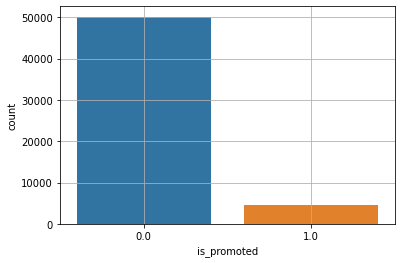

In [329]:
sns.countplot(ml.is_promoted)
plt.grid()
print(ml.is_promoted.value_counts())
plt.show()

## ML Models

In [330]:
lr = LogisticRegression()
kn = KNeighborsClassifier()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
xgbrf = XGBRFClassifier()
lgb = LGBMClassifier()
cat = CatBoostClassifier(verbose=False)

In [331]:
x = ml.drop('is_promoted',axis=1)
y = ml.is_promoted

In [332]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.15, random_state=43)

### Logistics Regression

test_metrics

test_acc : 0.9166869374847969 

confusion matrix :

[[7497   17]
 [ 668   40]]

classification report:

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      7514
         1.0       0.70      0.06      0.10       708

    accuracy                           0.92      8222
   macro avg       0.81      0.53      0.53      8222
weighted avg       0.90      0.92      0.88      8222

roc score : 0.7829907712759158


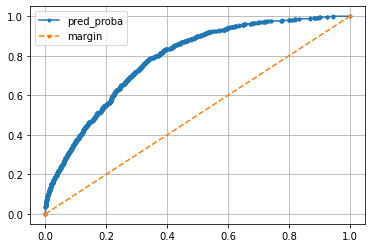

In [401]:
lr.fit(xtrain,ytrain)
lr_test_pred = lr.predict(xtest)
lr_test_pp = lr.predict_proba(xtest)
lr_test_acc = accuracy_score(ytest,lr_test_pred)
lr_test_cm = confusion_matrix(ytest,lr_test_pred)
lr_test_cr = classification_report(ytest,lr_test_pred)
lr_test_pp = lr_test_pp[:,1]
print('test_metrics\n')
print('test_acc :',lr_test_acc,'\n')
print('confusion matrix :\n')
print(lr_test_cm)
print('\nclassification report:\n')
print(lr_test_cr)

fpr,tpr,thres = roc_curve(ytest,lr_test_pp)
print('roc score :',roc_auc_score(ytest,lr_test_pp))
plt.plot(fpr,tpr,marker='.',label='pred_proba')
plt.plot([0,1],[0,1],linestyle='--',marker='.',label='margin')
plt.grid()
plt.legend()
plt.show()

### KNN

test_metrics

test_acc : 0.9225249331063001 

confusion matrix :

[[7468   46]
 [ 591  117]]

classification report:

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      7514
         1.0       0.72      0.17      0.27       708

    accuracy                           0.92      8222
   macro avg       0.82      0.58      0.61      8222
weighted avg       0.91      0.92      0.90      8222

roc score : 0.6862467837813858


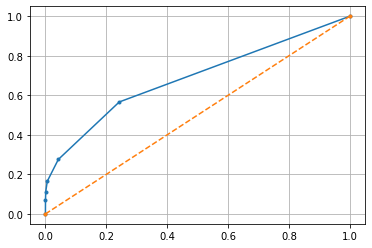

In [402]:
kn.fit(xtrain,ytrain)
kn_test_pred = kn.predict(xtest)
kn_test_pp = kn.predict_proba(xtest)
kn_test_acc = accuracy_score(ytest,kn_test_pred)
kn_test_cm = confusion_matrix(ytest,kn_test_pred)
kn_test_cr = classification_report(ytest,kn_test_pred)
kn_test_pp = kn_test_pp[:,1]
print('test_metrics\n')
print('test_acc :',kn_test_acc,'\n')
print('confusion matrix :\n')
print(kn_test_cm)
print('\nclassification report:\n')
print(kn_test_cr)

fpr,tpr,thres = roc_curve(ytest,kn_test_pp)
print('roc score :',roc_auc_score(ytest,kn_test_pp))
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],[0,1],linestyle='--',marker='.')
plt.grid()
plt.show()

### Decision Tree

test_metrics

test_acc : 0.8955242033568475 

confusion matrix :

[[7026  488]
 [ 371  337]]

classification report:

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94      7514
         1.0       0.41      0.48      0.44       708

    accuracy                           0.90      8222
   macro avg       0.68      0.71      0.69      8222
weighted avg       0.90      0.90      0.90      8222

roc score : 0.705486763690828


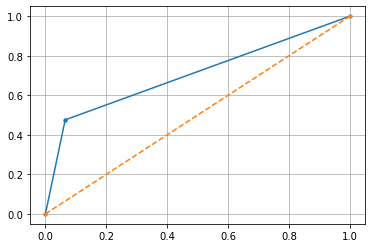

In [403]:
dt.fit(xtrain,ytrain)
dt_test_pred = dt.predict(xtest)
dt_test_pp = dt.predict_proba(xtest)
dt_test_acc = accuracy_score(ytest,dt_test_pred)
dt_test_cm = confusion_matrix(ytest,dt_test_pred)
dt_test_cr = classification_report(ytest,dt_test_pred)
dt_test_pp = dt_test_pp[:,1]
print('test_metrics\n')
print('test_acc :',dt_test_acc,'\n')
print('confusion matrix :\n')
print(dt_test_cm)
print('\nclassification report:\n')
print(dt_test_cr)

fpr,tpr,thres = roc_curve(ytest,dt_test_pp)
print('roc score :',roc_auc_score(ytest,dt_test_pp))

plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],[0,1],linestyle='--',marker='.')
plt.grid()
plt.show()

### Random Forest

test_metrics

test_acc : 0.9351739236195573 

confusion matrix :

[[7469   45]
 [ 488  220]]

classification report:

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      7514
         1.0       0.83      0.31      0.45       708

    accuracy                           0.94      8222
   macro avg       0.88      0.65      0.71      8222
weighted avg       0.93      0.94      0.92      8222

roc score : 0.8773475952233798


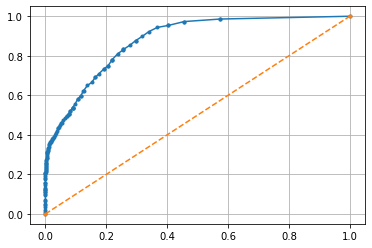

In [404]:
rf.fit(xtrain,ytrain)
rf_test_pred = rf.predict(xtest)
rf_test_pp = rf.predict_proba(xtest)
rf_test_acc = accuracy_score(ytest,rf_test_pred)
rf_test_cm = confusion_matrix(ytest,rf_test_pred)
rf_test_cr = classification_report(ytest,rf_test_pred)
rf_test_pp = rf_test_pp[:,1]
print('test_metrics\n')
print('test_acc :',rf_test_acc,'\n')
print('confusion matrix :\n')
print(rf_test_cm)
print('\nclassification report:\n')
print(rf_test_cr)

fpr,tpr,thres = roc_curve(ytest,rf_test_pp)
print('roc score :',roc_auc_score(ytest,rf_test_pp))
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],[0,1],linestyle='--',marker='.')
plt.grid()
plt.show()

### GB

test_metrics

test_acc : 0.9416200437849671 

confusion matrix :

[[7509    5]
 [ 475  233]]

classification report:

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      7514
         1.0       0.98      0.33      0.49       708

    accuracy                           0.94      8222
   macro avg       0.96      0.66      0.73      8222
weighted avg       0.94      0.94      0.93      8222



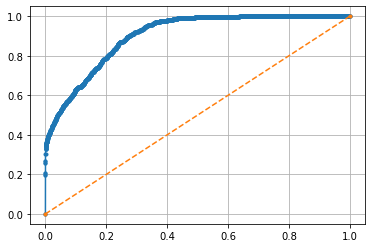

In [391]:
gb.fit(xtrain,ytrain)
gb_test_pred = gb.predict(xtest)
gb_test_pp = gb.predict_proba(xtest)
gb_test_acc = accuracy_score(ytest,gb_test_pred)
gb_test_cm = confusion_matrix(ytest,gb_test_pred)
gb_test_cr = classification_report(ytest,gb_test_pred)
gb_test_pp = gb_test_pp[:,1]
print('test_metrics\n')
print('test_acc :',gb_test_acc,'\n')
print('confusion matrix :\n')
print(gb_test_cm)
print('\nclassification report:\n')
print(gb_test_cr)

fpr,tpr,thres = roc_curve(ytest,gb_test_pp)
print('roc score :',roc_auc_score(ytest,gb_test_pp))
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],[0,1],linestyle='--',marker='.')
plt.grid()
plt.show()

### XGB

[16:55:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
test_metrics

test_acc : 0.9423497932376551 

confusion matrix :

[[7484   30]
 [ 444  264]]

classification report:

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      7514
         1.0       0.90      0.37      0.53       708

    accuracy                           0.94      8222
   macro avg       0.92      0.68      0.75      8222
weighted avg       0.94      0.94      0.93      8222



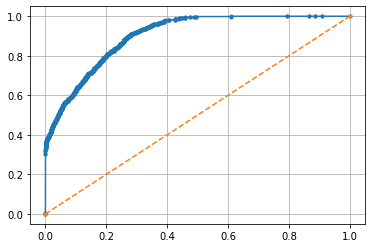

In [373]:
xgb.fit(xtrain,ytrain)
xgb_test_pred = xgb.predict(xtest)
xgb_test_pp = xgb.predict_proba(xtest)
xgb_test_acc = accuracy_score(ytest,xgb_test_pred)
xgb_test_cm = confusion_matrix(ytest,xgb_test_pred)
xgb_test_cr = classification_report(ytest,xgb_test_pred)
xgb_test_pp = xgb_test_pp[:,1]
print('test_metrics\n')
print('test_acc :',xgb_test_acc,'\n')
print('confusion matrix :\n')
print(xgb_test_cm)
print('\nclassification report:\n')
print(xgb_test_cr)

fpr,tpr,thres = roc_curve(ytest,xgb_test_pp)
print('roc score :',roc_auc_score(ytest,xgb_test_pp))
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],[0,1],linestyle='--',marker='.')
plt.grid()
plt.show()

### XGBRF

[17:09:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
test_metrics

test_acc : 0.932011675991243 

confusion matrix :

[[7506    8]
 [ 551  157]]

classification report:

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      7514
         1.0       0.95      0.22      0.36       708

    accuracy                           0.93      8222
   macro avg       0.94      0.61      0.66      8222
weighted avg       0.93      0.93      0.91      8222



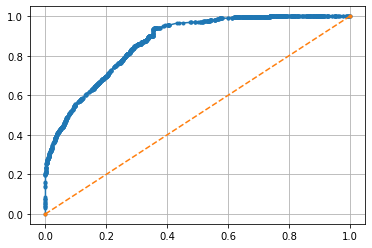

In [392]:
xgbrf.fit(xtrain,ytrain)
xgbrf_test_pred = xgbrf.predict(xtest)
xgbrf_test_pp = xgbrf.predict_proba(xtest)
xgbrf_test_acc = accuracy_score(ytest,xgbrf_test_pred)
xgbrf_test_cm = confusion_matrix(ytest,xgbrf_test_pred)
xgbrf_test_cr = classification_report(ytest,xgbrf_test_pred)
xgbrf_test_pp = xgbrf_test_pp[:,1]
print('test_metrics\n')
print('test_acc :',xgbrf_test_acc,'\n')
print('confusion matrix :\n')
print(xgbrf_test_cm)
print('\nclassification report:\n')
print(xgbrf_test_cr)

fpr,tpr,thres = roc_curve(ytest,xgbrf_test_pp)
print('roc score :',roc_auc_score(ytest,xgbrf_test_pp))

plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],[0,1],linestyle='--',marker='.')
plt.grid()
plt.show()

### Catboosting

test_metrics

test_acc : 0.9432011675991243 

confusion matrix :

[[7495   19]
 [ 448  260]]

classification report:

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      7514
         1.0       0.93      0.37      0.53       708

    accuracy                           0.94      8222
   macro avg       0.94      0.68      0.75      8222
weighted avg       0.94      0.94      0.93      8222

roc score : 0.9048501178214978


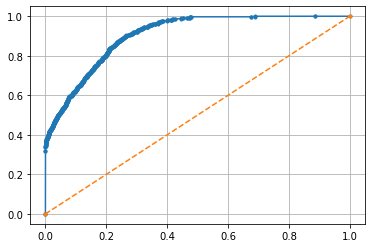

In [398]:
cat.fit(xtrain,ytrain)
cat_test_pred = cat.predict(xtest)
cat_test_pp = cat.predict_proba(xtest)
cat_test_acc = accuracy_score(ytest,cat_test_pred)
cat_test_cm = confusion_matrix(ytest,cat_test_pred)
cat_test_cr = classification_report(ytest,cat_test_pred)
cat_test_pp = cat_test_pp[:,1]
print('test_metrics\n')
print('test_acc :',cat_test_acc,'\n')
print('confusion matrix :\n')
print(cat_test_cm)
print('\nclassification report:\n')
print(cat_test_cr)

fpr,tpr,thres = roc_curve(ytest,cat_test_pp)
print('roc score :',roc_auc_score(ytest,cat_test_pp))
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],[0,1],linestyle='--',marker='.')
plt.grid()
plt.show()

### Light GBM

test_metrics

test_acc : 0.9435660423254683 

confusion matrix :

[[7503   11]
 [ 453  255]]

classification report:

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      7514
         1.0       0.96      0.36      0.52       708

    accuracy                           0.94      8222
   macro avg       0.95      0.68      0.75      8222
weighted avg       0.94      0.94      0.93      8222

roc score : 0.9066543769896946


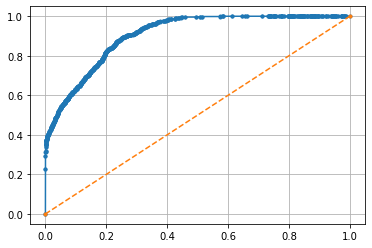

In [397]:
lgb.fit(xtrain,ytrain)
lgb_test_pred = lgb.predict(xtest)
lgb_test_pp = lgb.predict_proba(xtest)
lgb_test_acc = accuracy_score(ytest,lgb_test_pred)
lgb_test_cm = confusion_matrix(ytest,lgb_test_pred)
lgb_test_cr = classification_report(ytest,lgb_test_pred)
lgb_test_pp = lgb_test_pp[:,1]
print('test_metrics\n')
print('test_acc :',lgb_test_acc,'\n')
print('confusion matrix :\n')
print(lgb_test_cm)
print('\nclassification report:\n')
print(lgb_test_cr)

fpr,tpr,thres = roc_curve(ytest,lgb_test_pp)
print('roc score :',roc_auc_score(ytest,lgb_test_pp))
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],[0,1],linestyle='--',marker='.')
plt.grid()
plt.show()

In [405]:
lr_test_pp = lr_test_pp.tolist()
kn_test_pp = kn_test_pp.tolist()
dt_test_pp = dt_test_pp.tolist()
rf_test_pp = rf_test_pp.tolist()
gb_test_pp = gb_test_pp.tolist()
xgb_test_pp = xgb_test_pp.tolist()
xgbrf_test_pp = xgbrf_test_pp.tolist()
cat_test_pp = cat_test_pp.tolist()
lgb_test_pp = lgb_test_pp.tolist()

In [406]:
mean_probas = pd.DataFrame({'lr_test_pp':lr_test_pp , 'kn_test_pp':kn_test_pp ,'dt_test_pp':dt_test_pp,
             'rf_test_pp':rf_test_pp,'xgb_test_pp':xgb_test_pp,'xgbrf_test_pp':xgbrf_test_pp,'cat_test_pp':cat_test_pp,
             'lgb_test_pp':lgb_test_pp})

In [407]:
mean_probas.head()

,lr_test_pp,kn_test_pp,dt_test_pp,rf_test_pp,xgb_test_pp,xgbrf_test_pp,cat_test_pp,lgb_test_pp
0,0.242369,0.4,0.0,0.51,0.253771,0.207776,0.269102,0.252434
1,0.060316,0.0,0.0,0.03,0.043319,0.133371,0.052371,0.043580
2,0.104145,0.4,0.0,0.03,0.045811,0.132475,0.036864,0.037415
3,0.009604,0.0,0.0,0.00,0.000056,0.120160,0.000023,0.000797
4,0.150743,0.4,0.0,0.31,0.279501,0.195032,0.249975,0.195634


In [408]:
mp = []
for i in mean_probas.index:
    mp.append(mean_probas.iloc[i].mean())

### Choose if you want a single model's proba or the mean proba 

In [409]:
mean_probas['mean_proba'] = mp ## MEAN PROBA

In [410]:
# mean_probas['mean_proba'] = lgb_test_pp ## SINGLE MODEL PROBA

In [411]:
mean_probas.head()

,lr_test_pp,kn_test_pp,dt_test_pp,rf_test_pp,xgb_test_pp,xgbrf_test_pp,cat_test_pp,lgb_test_pp,mean_proba
0,0.242369,0.4,0.0,0.51,0.253771,0.207776,0.269102,0.252434,0.266931
1,0.060316,0.0,0.0,0.03,0.043319,0.133371,0.052371,0.043580,0.045369
2,0.104145,0.4,0.0,0.03,0.045811,0.132475,0.036864,0.037415,0.098339
3,0.009604,0.0,0.0,0.00,0.000056,0.120160,0.000023,0.000797,0.016330
4,0.150743,0.4,0.0,0.31,0.279501,0.195032,0.249975,0.195634,0.222611


In [414]:
fpr,tpr,threshold = roc_curve(ytest,mean_probas['mean_proba'])

In [415]:
final_probas = mean_probas['mean_proba']

In [416]:
print('\nlen of dataframe : ',len(pd.DataFrame({'threshold':threshold , 'fpr':fpr, 'tpr':tpr})))
pd.DataFrame({'threshold':threshold , 'fpr':fpr, 'tpr':tpr}).head(10)


len of dataframe :  789


,threshold,fpr,tpr
0,1.963468,0.000000,0.000000
1,0.963468,0.000000,0.001412
2,0.577858,0.000000,0.306497
3,0.576352,0.000133,0.306497
4,0.573934,0.000133,0.310734
5,0.573271,0.000266,0.310734
6,0.549226,0.000266,0.324859
7,0.543630,0.000532,0.324859
8,0.543337,0.000532,0.326271
9,0.543055,0.000665,0.326271


In [417]:
# final_probas

In [422]:
acc=[]
for i in threshold:
    ypred = np.where(final_probas>i,1,0)
    acc.append(accuracy_score(ytest,ypred))
    
decider = pd.concat([pd.Series(threshold),pd.Series(acc)],axis=1)
decider.rename(columns = {0: 'Threshold', 1: 'Accuracies'}, inplace = True)
decider.sort_values('Accuracies',ascending=False).head(10)

,Threshold,Accuracies
17,0.496064,0.942107
19,0.486459,0.941985
16,0.496969,0.941985
21,0.472505,0.941985
18,0.488621,0.941985
13,0.520472,0.941985
52,0.378363,0.941863
51,0.380523,0.941863
46,0.389554,0.941863
22,0.470452,0.941863


In [425]:
fins = []
for i in mean_probas.mean_proba:
    if i > 0.496:
        fins.append(1)
    else:
        fins.append(0)
mean_probas['predictions'] = fins


In [426]:
mean_probas.head()

,lr_test_pp,kn_test_pp,dt_test_pp,rf_test_pp,xgb_test_pp,xgbrf_test_pp,cat_test_pp,lgb_test_pp,mean_proba,predictions
0,0.242369,0.4,0.0,0.51,0.253771,0.207776,0.269102,0.252434,0.266931,0
1,0.060316,0.0,0.0,0.03,0.043319,0.133371,0.052371,0.043580,0.045369,0
2,0.104145,0.4,0.0,0.03,0.045811,0.132475,0.036864,0.037415,0.098339,0
3,0.009604,0.0,0.0,0.00,0.000056,0.120160,0.000023,0.000797,0.016330,0
4,0.150743,0.4,0.0,0.31,0.279501,0.195032,0.249975,0.195634,0.222611,0


In [429]:
mean_probas.predictions.value_counts()

0    7967
1     255
Name: predictions, dtype: int64

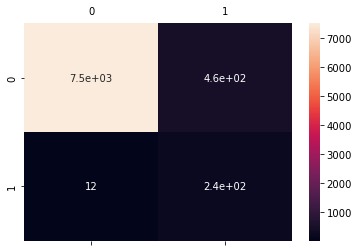

[[7502  465]
 [  12  243]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      7514
         1.0       0.95      0.34      0.50       708

    accuracy                           0.94      8222
   macro avg       0.95      0.67      0.74      8222
weighted avg       0.94      0.94      0.93      8222

ROC AUC Score : 0.8975251846271143


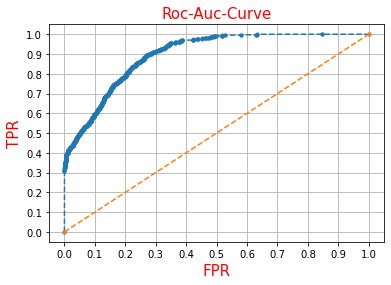

In [431]:
mean_cm = confusion_matrix(ytest,fins)
# print(mean_cm.transpose())
print('\n')
# print(mean_cm)
# print('\n')
sns.heatmap(mean_cm.transpose(),annot=True)
plt.tick_params(labeltop=True,labelbottom=False)
plt.show()
print(confusion_matrix(ytest,fins).transpose())
print(classification_report(ytest,fins))
plt.plot(fpr,tpr,linestyle='--',marker='.')
plt.plot([0,1],[0,1],linestyle='--',marker='.')
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.xlabel('FPR',fontdict={'color':'red','fontsize':15})
plt.ylabel('TPR',fontdict={'color':'red','fontsize':15})
plt.title('Roc-Auc-Curve',fontdict={'color':'red','fontsize':15})
plt.grid()
print('ROC AUC Score :',roc_auc_score(ytest,mean_probas.mean_proba))
plt.show()

In [432]:
final_threshold = threshold[17]

In [433]:
final_threshold

0.496063706290415

### Test data

In [443]:
test = df2.copy()

In [444]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,0.0,1,1,0,77,NaN
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,NaN
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,NaN
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,NaN
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,NaN


In [445]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23490 entries, 0 to 23489
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             23490 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  23490 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
 13  is_promoted           0 non-null      float64
dtypes: float64(2), int64(7), object(5)
memory usage: 2.7+ MB


In [446]:
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
employee_id,23490.0,39041.399149,22640.809201,3.0,19370.25,38963.5,58690.0,78295.0
no_of_trainings,23490.0,1.254236,0.600910,1.0,1.00,1.0,1.0,9.0
age,23490.0,34.782929,7.679492,20.0,29.00,33.0,39.0,60.0
previous_year_rating,23490.0,3.081567,1.505517,0.0,2.00,3.0,4.0,5.0
length_of_service,23490.0,5.810387,4.207917,1.0,3.00,5.0,7.0,34.0
KPIs_met >80%,23490.0,0.358834,0.479668,0.0,0.00,0.0,1.0,1.0
awards_won?,23490.0,0.022776,0.149191,0.0,0.00,0.0,0.0,1.0
avg_training_score,23490.0,63.263133,13.411750,39.0,51.00,60.0,76.0,99.0
is_promoted,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Imputing Nulls

In [447]:
test.isnull().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [448]:
# test.drop('employee_id',axis=1,inplace=True)
test.drop('is_promoted',axis=1,inplace=True)

In [464]:
test.region.nunique()

34

In [465]:
df.region.nunique()

34

In [454]:
test['department'].replace(dept_list,dept_id,True)

In [455]:
# dept = []
# for i in test.department:
#     if i == 'Sales & Marketing':
#         dept.append(1)
#     elif i == 'Operations':
#         dept.append(2)
#     elif i == 'Technology':
#         dept.append(3)
#     elif i == 'Analytics':
#         dept.append(4)
#     elif i == 'R&D':
#         dept.append(5)
#     elif i == 'Procurement':
#         dept.append(6)
#     elif i == 'Finance':
#         dept.append(7)
#     elif i == 'HR':
#         dept.append(8)
#     elif i == 'Legal':
#         dept.append(9)
        
# test['department'] = dept

In [458]:
test['education'].replace(edu_list,edu_id,True)

In [459]:
# edu = []
# for i in test.education:
#     if i == "Bachelor's":
#         edu.append(2)
#     elif i == "Master's & above":
#         edu.append(1)
#     elif i == "Below Secondary":
#         edu.append(3)
# test['education'] = edu

In [461]:
test['gender'].replace(gen_list,gen_id,True)

In [462]:
# gen = []
# for i in test.gender:
#     if i == 'f':
#         gen.append(1)
#     elif i == 'm':
#         gen.append(2)
# test['gender'] = gen

In [469]:
test['region'].replace(reg_list,reg_id,True)

In [467]:
# rc = []
# for i in test.recruitment_channel:
#     if i == 'other':
#         rc.append(1)
#     elif i == 'sourcing':
#         rc.append(2)
#     elif i == 'referred':
#         rc.append(3)
# test['recruitment_channel'] = rc

In [472]:
test['recruitment_channel'].replace(rc_list,rc_id,True)

In [473]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,3,5,2,2,1,1,24,0.0,1,1,0,77
1,74430,8,10,2,1,2,1,31,3.0,5,0,0,51
2,72255,1,19,2,2,2,1,31,1.0,4,0,0,47
3,38562,6,6,2,1,2,3,31,2.0,9,0,0,65
4,64486,7,11,2,2,1,1,30,4.0,7,0,0,61


In [479]:
eid = test.employee_id.tolist()

In [483]:
test.drop('employee_id',axis=1,inplace=True)

In [484]:
x_train = ml.drop('is_promoted',axis=1)
y_train = ml.is_promoted

In [485]:
x_test = test

In [486]:
lgb.fit(x_train,y_train)
lgb_final_pred = lgb.predict(x_test)
lgb_final_pp = lgb.predict_proba(x_test)
lgb_final_pp = lgb_final_pp[:,1]

In [487]:
cat.fit(x_train,y_train)
cat_final_pred = cat.predict(x_test)
cat_final_pp = cat.predict_proba(x_test)
cat_final_pp = cat_final_pp[:,1]

In [488]:
lr.fit(x_train,y_train)
lr_final_pred = lr.predict(x_test)
lr_final_pp = lr.predict_proba(x_test)
lr_final_pp = lr_final_pp[:,1]

In [489]:
kn.fit(x_train,y_train)
kn_final_pred = kn.predict(x_test)
kn_final_pp = kn.predict_proba(x_test)
kn_final_pp = kn_final_pp[:,1]

In [512]:
gb.fit(x_train,y_train)
gb_final_pred = gb.predict(x_test)
gb_final_pp = gb.predict_proba(x_test)
gb_final_pp = gb_final_pp[:,1]

In [492]:
dt.fit(x_train,y_train)
dt_final_pred = dt.predict(x_test)
dt_final_pp = dt.predict_proba(x_test)
dt_final_pp = dt_final_pp[:,1]

In [493]:
rf.fit(x_train,y_train)
rf_final_pred = rf.predict(x_test)
rf_final_pp = rf.predict_proba(x_test)
rf_final_pp = rf_final_pp[:,1]

In [494]:
xgb.fit(x_train,y_train)
xgb_final_pred = xgb.predict(x_test)
xgb_final_pp = xgb.predict_proba(x_test)
xgb_final_pp = xgb_final_pp[:,1]

[17:40:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [495]:
xgbrf.fit(x_train,y_train)
xgbrf_final_pred = xgbrf.predict(x_test)
xgbrf_final_pp = xgbrf.predict_proba(x_test)
xgbrf_final_pp = xgbrf_final_pp[:,1]

[17:42:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [500]:
lgb_final_pp = lgb_final_pp.tolist()
cat_final_pp = cat_final_pp.tolist()
lr_final_pp = lr_final_pp.tolist()
kn_final_pp = kn_final_pp.tolist()
# gnb_final_pp = gnb_final_pp.tolist()
dt_final_pp = dt_final_pp.tolist()
rf_final_pp = rf_final_pp.tolist()
xgb_final_pp = xgb_final_pp.tolist()
xgbrf_final_pp = xgbrf_final_pp.tolist()

In [513]:
final_probas = pd.DataFrame({'lr':lr_final_pp,'kn':kn_final_pp,'dt':dt_final_pp,'gb':gb_final_pp,
                            'rf':rf_final_pp,'xgb':xgb_final_pp,'xgbrf':xgbrf_final_pp,'lgb':lgb_final_pp,'cat':cat_final_pp})

In [514]:
final_probas.head()

,lr,kn,dt,gb,rf,xgb,xgbrf,lgb,cat
0,0.227289,0.2,0.0,0.153312,0.12,0.148865,0.197067,0.169537,0.125188
1,0.014052,0.0,0.0,0.002982,0.00,0.000269,0.120016,0.000966,0.000225
2,0.015182,0.0,0.0,0.002392,0.00,0.000052,0.119900,0.000301,0.000002
3,0.020410,0.0,0.0,0.009987,0.00,0.000752,0.132026,0.002066,0.000421
4,0.030735,0.2,0.0,0.010914,0.01,0.001408,0.130987,0.001084,0.001515


In [515]:
f_prob = []
for i in final_probas.index:
    f_prob.append(final_probas.iloc[i].mean())


In [516]:
final_probas['final_prob'] = f_prob

In [517]:
final_probablities = final_probas['final_prob']

In [518]:
final_probablities

0        0.149029
1        0.015390
2        0.015314
3        0.018407
4        0.042960
           ...   
23485    0.020996
23486    0.025013
23487    0.016081
23488    0.019270
23489    0.690866
Name: final_prob, Length: 23490, dtype: float64

In [520]:
final_threshold

0.496063706290415

In [521]:
results = []
for i in final_probablities:
    if i > final_threshold:
        results.append(1)
    else:
        results.append(0)


In [522]:
final = pd.DataFrame({'employee_id':eid , 'is_promoted':results})

In [523]:
final.to_csv('submission_04_allmodels_roc_auc_049_threshold.csv',index=False)